In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

# **pretrained model:**
we can use pretraind models with ```tf.keras.applications```
- ```Model_name```: Instantiates the Model architecture.

- ```decode_predictions(...)```: Decodes the prediction of an ImageNet model.

- ```preprocess_input(...)```: Preprocesses a tensor or Numpy array encoding a batch of images.

- see more: https://www.tensorflow.org/api_docs/python/tf/keras/applications

## **1.VGG16**
- ```tf.keras.applications.vgg16.VGG16()```
    - include_top=True,
    - weights='imagenet',
    - input_tensor=None,
    - input_shape=None,
    - pooling=None,
    - classes=1000,
    - classifier_activation='softmax'


In [2]:
model = tf.keras.applications.vgg16.VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 17s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [3]:
# get the test images
!gdown --id 1VyfggIFN2H6cubfh3_yUdicNicZa9sAp
!unzip images.zip
!rm rf images/class1/.DS_Store  

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VyfggIFN2H6cubfh3_yUdicNicZa9sAp
To: /content/images.zip
100% 1.46M/1.46M [00:00<00:00, 210MB/s]
Archive:  images.zip
   creating: images/
  inflating: images/.DS_Store        
   creating: images/class1/
  inflating: images/class1/.DS_Store  
  inflating: images/class1/1539714414867.jpg  
  inflating: images/class1/81z6x3SZEpL._AC_SL1500_.jpg  
  inflating: images/class1/Basketball_(Ball).jpg  
  inflating: images/class1/German_Shepherd_-_DSC_0346_(10096362833).jpg  
  inflating: images/class1/christmas-stockings-3006869_1280.jpg  
  inflating: images/class1/download.jpg  
  inflating: images/class1/limo-safety-ftr.jpg  
  inflating: images/class1/long-haired-collie-5766447_1280.jpg  
  inflating: images/class1/spiderweb

In [7]:
path = "/content/images/class1/"
fileNames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
fileNames

['81z6x3SZEpL._AC_SL1500_.jpg',
 'spiderweb_1050x700.jpg',
 'Basketball_(Ball).jpg',
 'download.jpg',
 '1539714414867.jpg',
 'christmas-stockings-3006869_1280.jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg',
 'limo-safety-ftr.jpg',
 'long-haired-collie-5766447_1280.jpg']

In [33]:
def getPrediction(preprocess, decode, size=224):
    fig=plt.figure(figsize=(9,9))
    for (i,file) in enumerate(fileNames):
        img = tf.keras.utils.load_img(path+file, target_size=(size, size))
        x = tf.keras.preprocessing.image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess(x)
        
        #load image using opencv
        img2 = cv2.imread(path+file)
        
        # Get Predictions
        preds = model.predict(x, verbose=0)
        predictions = decode(preds, top=3)[0]
        print(f"{i+1}th {predictions}")

        # Plot image
        sub = fig.add_subplot(3, 3, i+1)
        sub.set_title(f'Predicted {str(predictions[0][1])}')
        plt.axis(False)
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    plt.show()

1th [('n03223299', 'doormat', 0.99202615), ('n04599235', 'wool', 0.0050805784), ('n02808304', 'bath_towel', 0.0021834048)]
2th [('n04275548', 'spider_web', 0.97702754), ('n01773797', 'garden_spider', 0.011418634), ('n01773549', 'barn_spider', 0.009331089)]
3th [('n02802426', 'basketball', 0.9969477), ('n04118538', 'rugby_ball', 0.0012899289), ('n04254680', 'soccer_ball', 0.00047221655)]
4th [('n03930313', 'picket_fence', 0.11685872), ('n04270147', 'spatula', 0.054026913), ('n04371774', 'swing', 0.047010735)]
5th [('n07880968', 'burrito', 0.9866269), ('n07583066', 'guacamole', 0.008800089), ('n07697537', 'hotdog', 0.0020050392)]
6th [('n03026506', 'Christmas_stocking', 0.9999466), ('n04254777', 'sock', 3.6072095e-05), ('n03775071', 'mitten', 6.3929433e-06)]
7th [('n02106662', 'German_shepherd', 0.9971667), ('n02105162', 'malinois', 0.0026627106), ('n02096051', 'Airedale', 2.9351584e-05)]
8th [('n03670208', 'limousine', 0.9995802), ('n03100240', 'convertible', 0.00018712979), ('n02814533

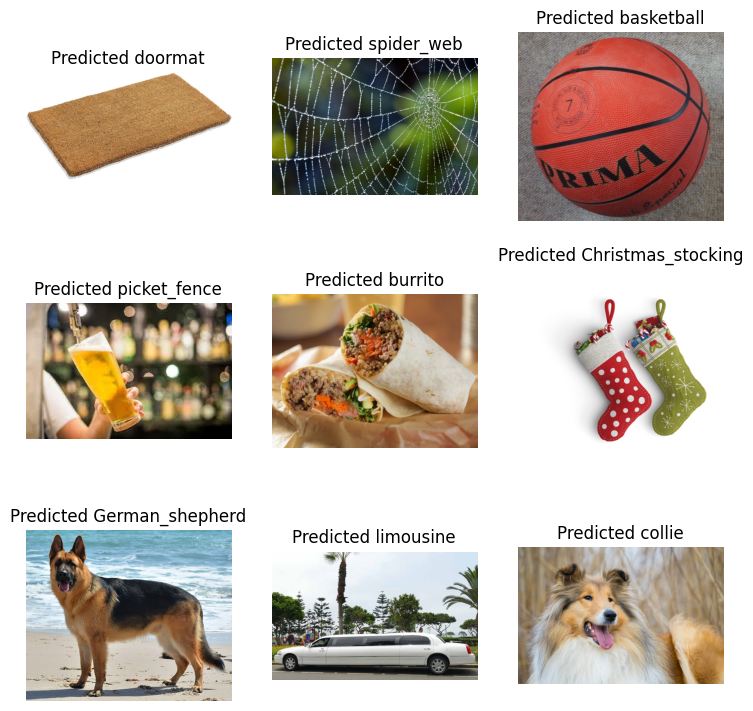

In [28]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

getPrediction(preprocess_input, decode_predictions)

## **2.ResNet50**
- ```tf.keras.applications.resnet50.ResNet50```
    - include_top=True,
    - weights='imagenet',
    - input_tensor=None,
    - input_shape=None,
    - pooling=None,
    - classes=1000,
    - **kwargs


102967424/102967424 [==============================] - 4s 0us/step
1th [('n03223299', 'doormat', 0.99928004), ('n03530642', 'honeycomb', 0.00021676222), ('n02808304', 'bath_towel', 0.00014457527)]
2th [('n04275548', 'spider_web', 0.9995159), ('n01773797', 'garden_spider', 0.00036489777), ('n01773549', 'barn_spider', 9.726631e-05)]
3th [('n02802426', 'basketball', 1.0), ('n04118538', 'rugby_ball', 4.0742555e-11), ('n04023962', 'punching_bag', 1.2545868e-12)]
4th [('n02823428', 'beer_bottle', 0.7229411), ('n02823750', 'beer_glass', 0.24762905), ('n03983396', 'pop_bottle', 0.0075625186)]
5th [('n07880968', 'burrito', 0.999064), ('n07583066', 'guacamole', 0.00046728138), ('n03041632', 'cleaver', 0.00024007703)]
6th [('n03026506', 'Christmas_stocking', 0.99991727), ('n04254777', 'sock', 2.9371084e-05), ('n04026417', 'purse', 8.885237e-06)]
7th [('n02106662', 'German_shepherd', 0.9995098), ('n02105162', 'malinois', 0.0002614659), ('n02115641', 'dingo', 6.813361e-05)]
8th [('n03670208', 'limo

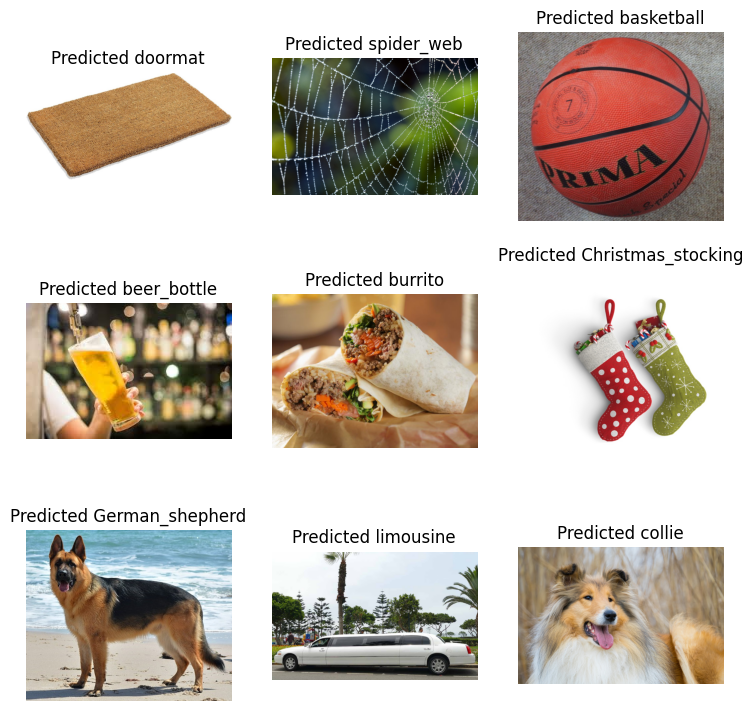

In [30]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


model = tf.keras.applications.ResNet50(weights='imagenet')
# model.summary()
getPrediction(preprocess_input, decode_predictions)

## **3.InceptionV3**
- ```tf.keras.applications.inception_v3.InceptionV3```
    - include_top=True,
    - weights='imagenet',
    - input_tensor=None,
    - input_shape=None,
    - pooling=None,
    - classes=1000,
    - classifier_activation='softmax'


1th [('n03223299', 'doormat', 0.94951695), ('n04599235', 'wool', 0.0028646032), ('n03482405', 'hamper', 0.00079728104)]
2th [('n04275548', 'spider_web', 0.75735843), ('n01773797', 'garden_spider', 0.010265447), ('n04548362', 'wallet', 0.007112302)]
3th [('n02802426', 'basketball', 0.99989593), ('n01770081', 'harvestman', 3.4499317e-06), ('n02279972', 'monarch', 2.4240544e-06)]
4th [('n02823750', 'beer_glass', 0.17048512), ('n07615774', 'ice_lolly', 0.03171676), ('n03937543', 'pill_bottle', 0.027093427)]
5th [('n07880968', 'burrito', 0.9858154), ('n07697313', 'cheeseburger', 0.00040893813), ('n07583066', 'guacamole', 0.00027678898)]
6th [('n03026506', 'Christmas_stocking', 0.9989465), ('n04254777', 'sock', 4.0287247e-05), ('n02028035', 'redshank', 3.1300304e-05)]
7th [('n02106662', 'German_shepherd', 0.8696459), ('n03803284', 'muzzle', 0.027263071), ('n02091467', 'Norwegian_elkhound', 0.00176474)]
8th [('n03670208', 'limousine', 0.9618102), ('n02917067', 'bullet_train', 0.00025204048), 

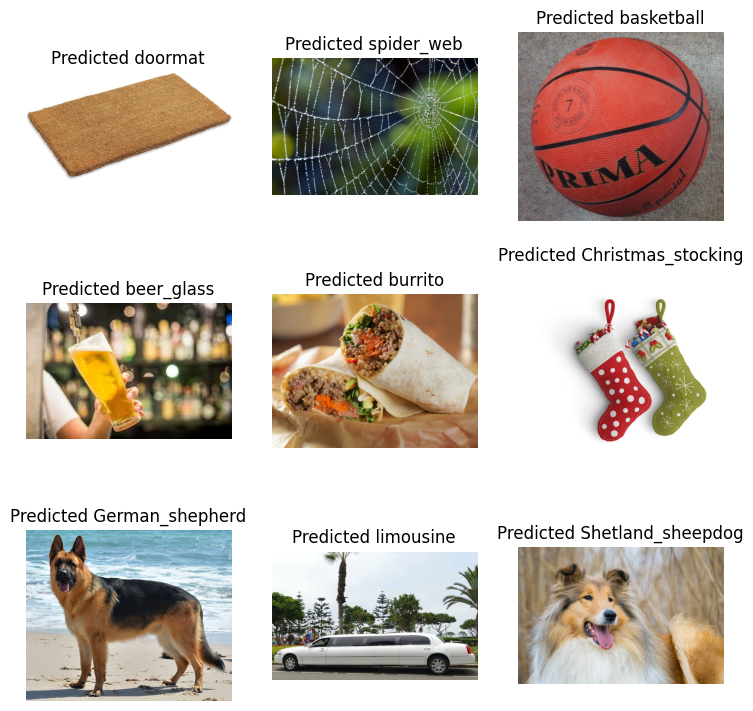

In [34]:
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

model = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet')
# model.summary()
getPrediction(preprocess_input, decode_predictions, size=299)

## **4. MobileNet** 
- ```tf.keras.applications.mobilenet_v2.MobileNetV2```
    - input_shape=None,
    - alpha=1.0,
    - include_top=True,
    - weights='imagenet',
    - input_tensor=None,
    - pooling=None,
    - classes=1000,
    - classifier_activation='softmax',
    - **kwargs


1th [('n04548362', 'wallet', 0.50717264), ('n03223299', 'doormat', 0.4650364), ('n04599235', 'wool', 0.0030549208)]
2th [('n04275548', 'spider_web', 0.7754011), ('n01773797', 'garden_spider', 0.04064774), ('n01773549', 'barn_spider', 0.038869124)]
3th [('n02802426', 'basketball', 0.9993199), ('n04118538', 'rugby_ball', 0.00046618396), ('n03134739', 'croquet_ball', 4.221841e-05)]
4th [('n03888605', 'parallel_bars', 0.13318318), ('n02823428', 'beer_bottle', 0.07896921), ('n02823750', 'beer_glass', 0.07760479)]
5th [('n07880968', 'burrito', 0.92595595), ('n07717556', 'butternut_squash', 0.015482329), ('n07697537', 'hotdog', 0.009163861)]
6th [('n03026506', 'Christmas_stocking', 0.8159432), ('n04026417', 'purse', 0.045605212), ('n04254777', 'sock', 0.018345464)]
7th [('n02106662', 'German_shepherd', 0.95844996), ('n02115641', 'dingo', 0.0025129786), ('n02105162', 'malinois', 0.0022183992)]
8th [('n03670208', 'limousine', 0.96992874), ('n03100240', 'convertible', 0.01307343), ('n04285008', 

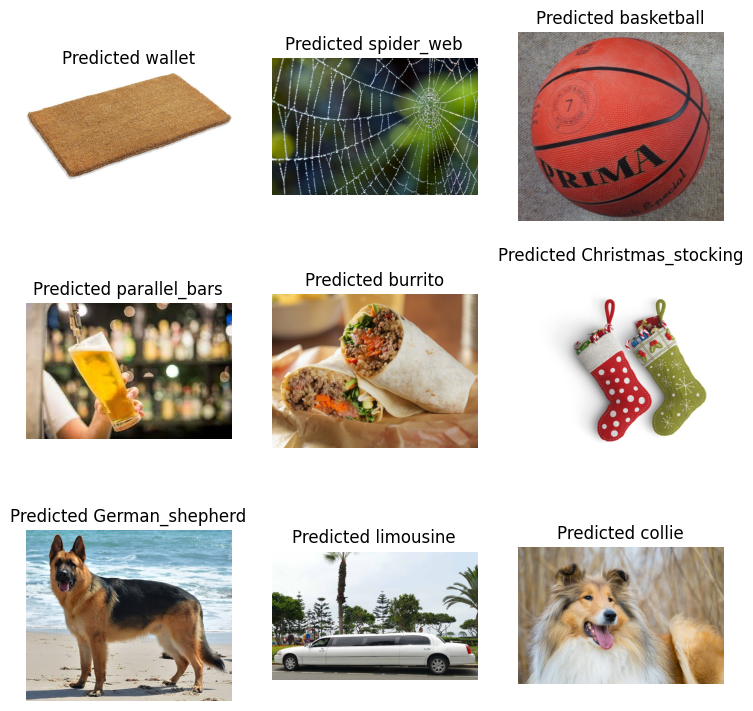

In [36]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

model = tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet')
# model.summary()
getPrediction(preprocess_input, decode_predictions)

## **5. DenseNet201** 
- ```tf.keras.applications.densenet.DenseNet201
    - include_top=True,
    - weights='imagenet',
    - input_tensor=None,
    - input_shape=None,
    - pooling=None,
    - classes=1000,
    - classifier_activation='softmax'

1th [('n03223299', 'doormat', 0.99987245), ('n02808304', 'bath_towel', 5.1700776e-05), ('n04599235', 'wool', 3.3841618e-05)]
2th [('n04275548', 'spider_web', 0.9788866), ('n01773797', 'garden_spider', 0.009407873), ('n01773157', 'black_and_gold_garden_spider', 0.005638136)]
3th [('n02802426', 'basketball', 0.999987), ('n04118538', 'rugby_ball', 1.1453501e-05), ('n04409515', 'tennis_ball', 1.0348379e-06)]
4th [('n07615774', 'ice_lolly', 0.47325736), ('n02823750', 'beer_glass', 0.31118956), ('n07932039', 'eggnog', 0.025482753)]
5th [('n07880968', 'burrito', 0.99978393), ('n07875152', 'potpie', 8.024744e-05), ('n07871810', 'meat_loaf', 3.2908807e-05)]
6th [('n03026506', 'Christmas_stocking', 0.9999522), ('n04254777', 'sock', 3.900059e-05), ('n03908618', 'pencil_box', 4.9371633e-06)]
7th [('n02106662', 'German_shepherd', 0.9671915), ('n02115641', 'dingo', 0.0032396873), ('n02105162', 'malinois', 0.0024878911)]
8th [('n03670208', 'limousine', 0.99995506), ('n03100240', 'convertible', 3.4668

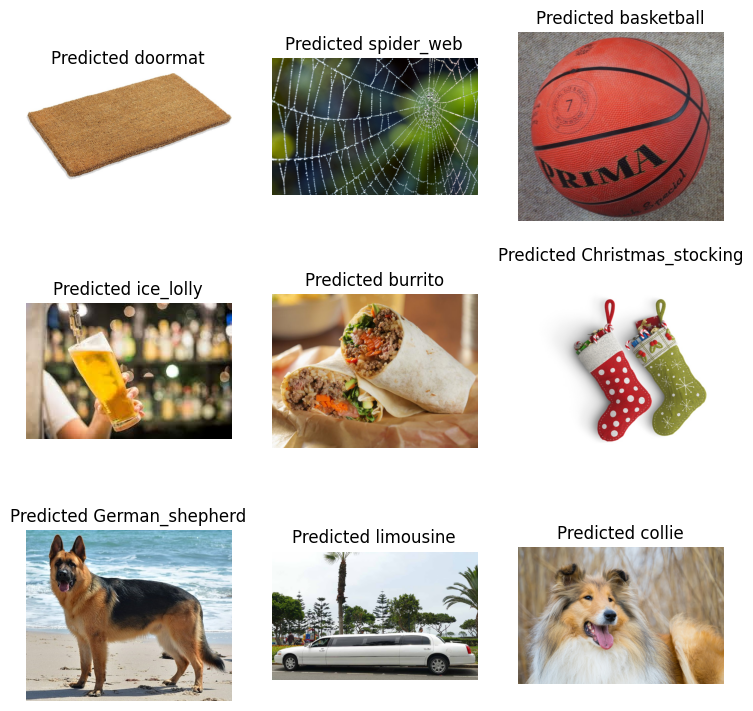

In [42]:
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions

model = tf.keras.applications.densenet.DenseNet201(weights='imagenet')
# model.summary()
getPrediction(preprocess_input, decode_predictions)

## **6. Mobile NASNet** 
- ```tf.keras.applications.nasnet.NASNetLarge```
    - input_shape=None,
    - include_top=True,
    - weights='imagenet',
    - input_tensor=None,
    - pooling=None,
    - classes=1000,
    - classifier_activation='softmax'

359748576/359748576 [==============================] - 14s 0us/step
1th [('n03223299', 'doormat', 0.83973813), ('n02808304', 'bath_towel', 0.0022295685), ('n04599235', 'wool', 0.0010267588)]
2th [('n04275548', 'spider_web', 0.90993094), ('n01773549', 'barn_spider', 0.006655432), ('n01773797', 'garden_spider', 0.0039068107)]
3th [('n02802426', 'basketball', 0.912733), ('n04409515', 'tennis_ball', 0.0003680317), ('n07747607', 'orange', 0.0003288232)]
4th [('n02823750', 'beer_glass', 0.9447465), ('n02823428', 'beer_bottle', 0.008583519), ('n02815834', 'beaker', 0.0032729977)]
5th [('n07880968', 'burrito', 0.88671017), ('n07583066', 'guacamole', 0.0013725627), ('n07697537', 'hotdog', 0.0005064905)]
6th [('n03026506', 'Christmas_stocking', 0.8549711), ('n04254777', 'sock', 0.0009103766), ('n03775071', 'mitten', 0.0007501027)]
7th [('n02106662', 'German_shepherd', 0.8939179), ('n02105162', 'malinois', 0.0021334363), ('n03803284', 'muzzle', 0.0013389307)]
8th [('n03670208', 'limousine', 0.912

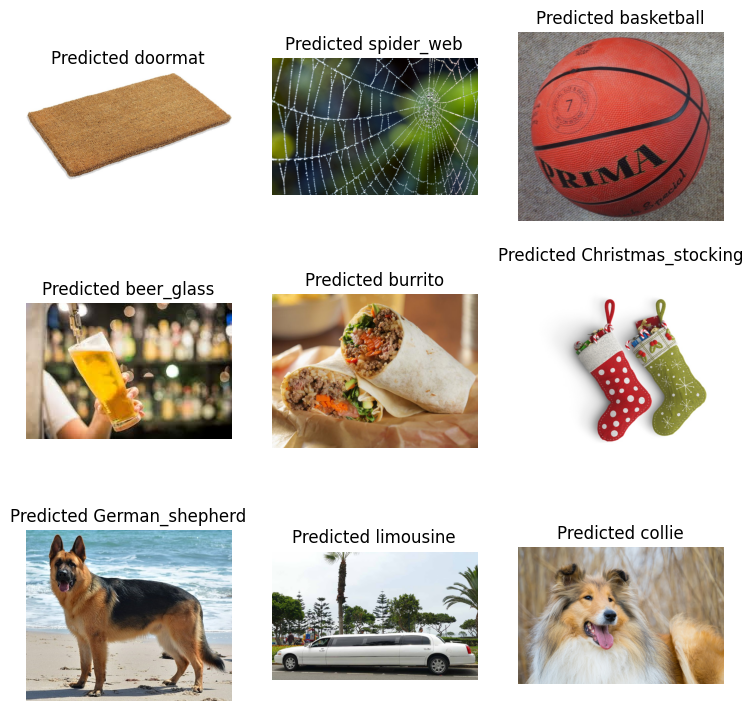

In [43]:
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions

model = tf.keras.applications.nasnet.NASNetLarge(weights='imagenet')
# model.summary()
getPrediction(preprocess_input, decode_predictions, size=331)